In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


import pandas as pd
import requests
import re

In [2]:
import codecs, json

In [3]:
with codecs.open('mlflashcards_tweets_large.json', 'r', 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

In [4]:
len(tweets)

241

In [11]:
t = tweets[5]

In [12]:
t

{'fullname': 'Chris Albon',
 'id': '960977759915851776',
 'likes': '6',
 'replies': '2',
 'retweets': '1',
 'text': 'Alpha In Ridge Regression https://machinelearningflashcards.com\xa0pic.twitter.com/DFdSKO7DiH',
 'timestamp': '2018-02-06T20:45:26',
 'url': '/chrisalbon/status/960977759915851776',
 'user': 'chrisalbon'}

In [13]:
def get_tweet_url(tweet):
    return 'https://twitter.com' + tweet['url']

In [14]:
tweet_url = get_tweet_url(t)
print(tweet_url)

https://twitter.com/chrisalbon/status/960977759915851776


In [15]:
def get_tweet_text(tweet):
    text = tweet['text']
    res = re.search('(.*) https.*', text)
    if res:
        text = res.group(1)
    else:
        text = None
    return text

In [16]:
get_tweet_text(t)

'Alpha In Ridge Regression'

In [17]:
rows = []
for tweet in tweets[:]:
    row = {"id": tweet['id'],
            "likes": tweet['likes'],
            "replies": tweet['replies'],
            "retweets": tweet['retweets'],
            "timestamp": tweet['timestamp'],
            "url": get_tweet_url(tweet),
            "text": get_tweet_text(tweet)}
    rows.append(row)

In [19]:
print(len(rows))
#rows

241


In [21]:
df = pd.DataFrame.from_dict(rows)
df.head()

,id,likes,replies,retweets,text,timestamp,url
0,892802102702911488,1,0,1,None,2017-08-02T17:39:43,https://twitter.com/chrisalbon/status/89280210...
1,961698946698567680,5,0,0,Threshold Activation,2018-02-08T20:31:11,https://twitter.com/chrisalbon/status/96169894...
2,961666291189743616,23,0,5,Chi-Squared,2018-02-08T18:21:25,https://twitter.com/chrisalbon/status/96166629...
3,961337263299821568,28,1,4,MinMax Scaling,2018-02-07T20:33:59,https://twitter.com/chrisalbon/status/96133726...
4,961302907969654784,22,0,2,Probability Density Function,2018-02-07T18:17:28,https://twitter.com/chrisalbon/status/96130290...


In [22]:
def get_img_url(tweet_url):
    page_data = requests.get(tweet_url).text
    res = re.search('data-image-url="(.*)"', page_data)
    if res:
        img_url = res.group(1)
    else:
        img_url = None
    return img_url

In [23]:
tweet_url

'https://twitter.com/chrisalbon/status/960977759915851776'

In [24]:
get_img_url(tweet_url)

'https://pbs.twimg.com/media/DVYULevV4AAGJCd.png'

In [25]:
 df['img_url'] = [get_img_url(tweet_url)  for tweet_url in df.url]

In [26]:
df.tail()

,id,likes,replies,retweets,text,timestamp,url,img_url
236,946078250698018816,19,1,0,Bayes Error,2017-12-27T18:00:06,https://twitter.com/chrisalbon/status/94607825...,https://pbs.twimg.com/media/DSElJ54VQAEtuvF.png
237,945751084974333952,47,3,13,Occams Razor,2017-12-26T20:20:04,https://twitter.com/chrisalbon/status/94575108...,https://pbs.twimg.com/media/DR_7mSwV4AAw6ZW.png
238,945717937234591744,8,0,1,K-Fold Cross-Validation,2017-12-26T18:08:21,https://twitter.com/chrisalbon/status/94571793...,https://pbs.twimg.com/media/DR_dc5RVAAAMkcK.png
239,945383421299191808,18,1,1,Extrema,2017-12-25T19:59:06,https://twitter.com/chrisalbon/status/94538342...,https://pbs.twimg.com/media/DR6tNhWVQAAB2gr.png
240,945363817839566849,34,1,7,Softmax Activation Function,2017-12-25T18:41:12,https://twitter.com/chrisalbon/status/94536381...,https://pbs.twimg.com/media/DR6bYdaUIAAo3_H.png


In [27]:
df.to_csv("chrisalbon_mlflashcards.csv", index=False)

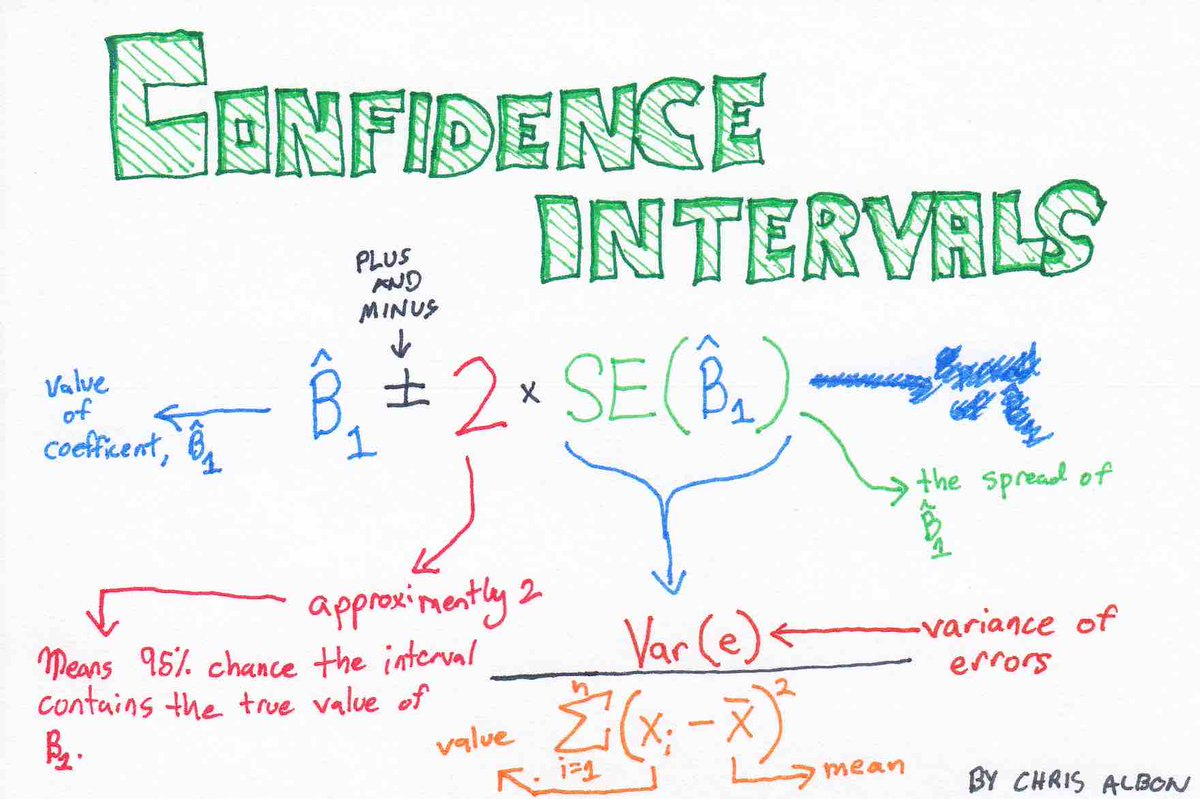

In [29]:
img_url = 'https://pbs.twimg.com/media/DGPcXPAVwAAfbqV.jpg'
img_data = requests.get(img_url).content
with open('test.png', 'wb') as handler:
    handler.write(img_data)
from IPython.display import Image
Image("test.png")